In [ ]:
! pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                              title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
jainaru/world-happiness-report-2024-yearly-updated               World Happiness Report- 2024                       62KB  2024-05-15 19:04:34           1605         32  1.0              
rahulvyasm/netflix-movies-and-tv-shows                           Netflix Movies and TV Shows                         1MB  2024-04-10 09:48:38          21012        464  1.0              
sahirmaharajj/school-student-daily-attendance                    School Student Daily Attendance                     2MB  2024-04-29 19:29:56           5492        115  1.0              
kerem

In [ ]:
! kaggle datasets download -d gti-upm/leapgestrecog

Dataset URL: https://www.kaggle.com/datasets/gti-upm/leapgestrecog
License(s): CC-BY-NC-SA-4.0
leapgestrecog.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/leapgestrecog.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cv2
import os

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/leapGestRecog/00'
val_dir = '/content/leapGestRecog/01'
test_dir = '/content/leapGestRecog/02'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 2000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.save('my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


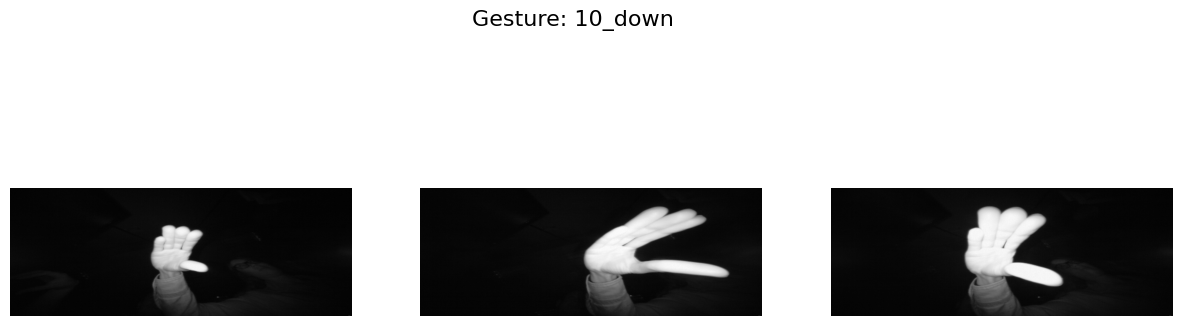

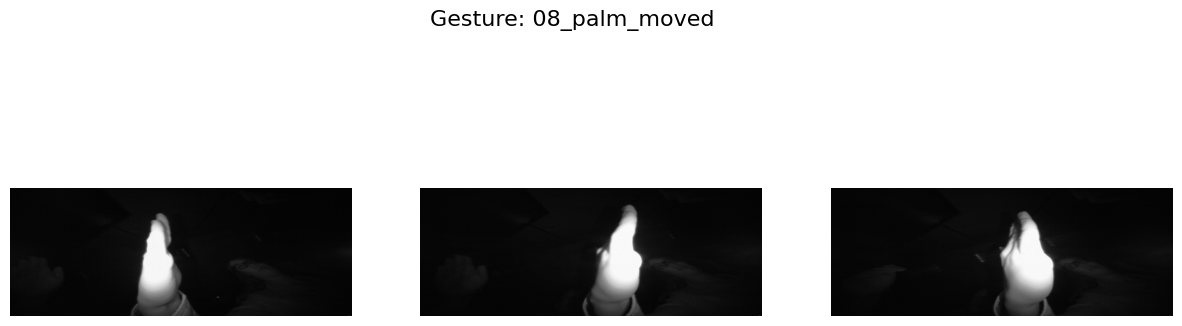

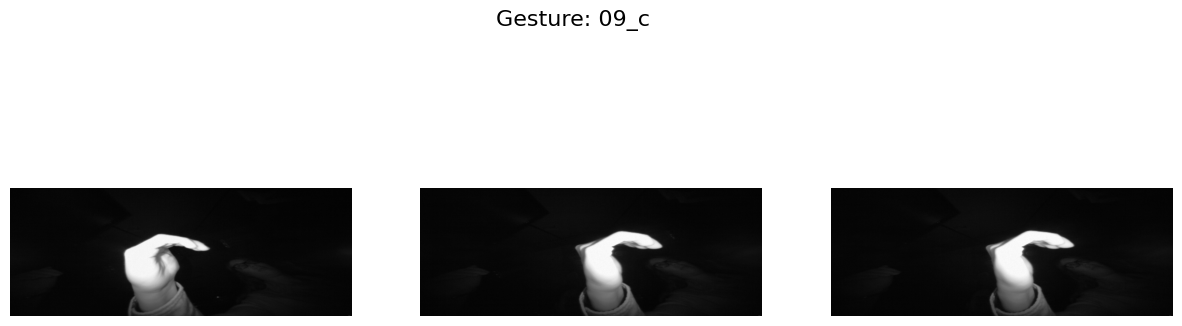

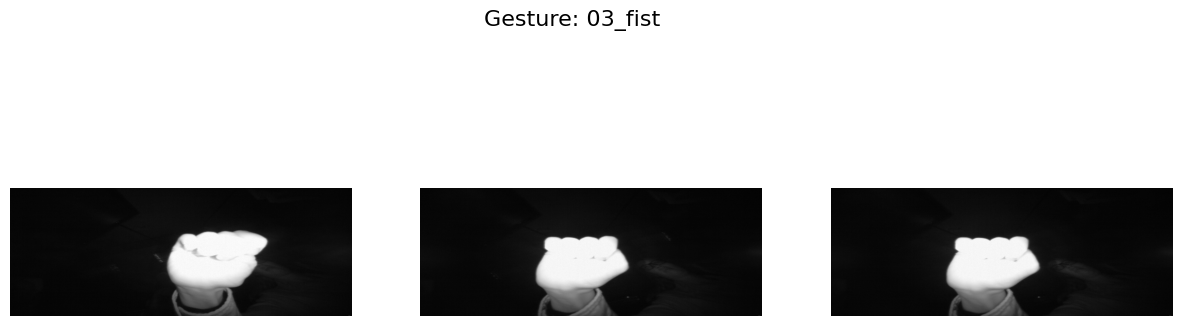

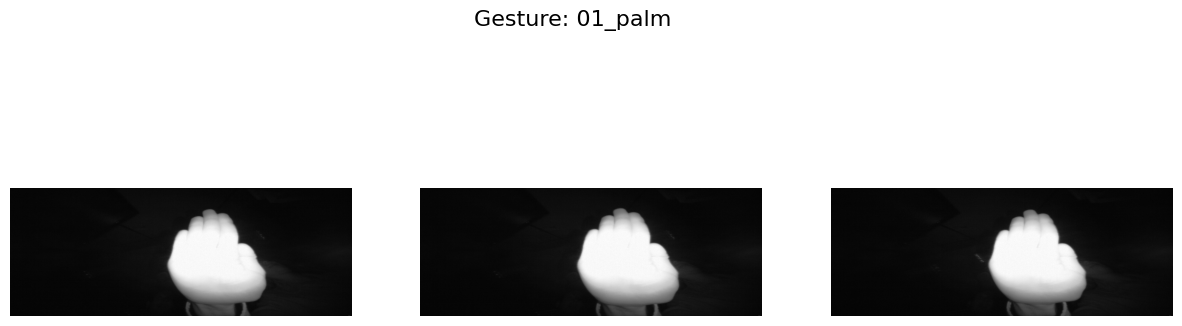

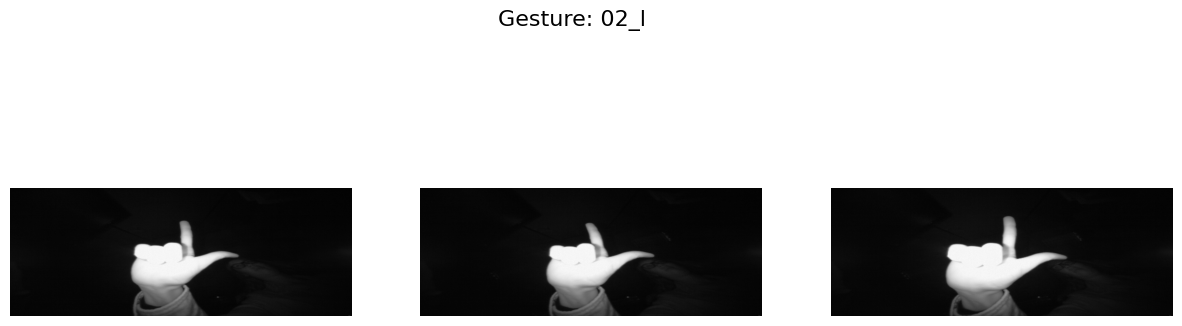

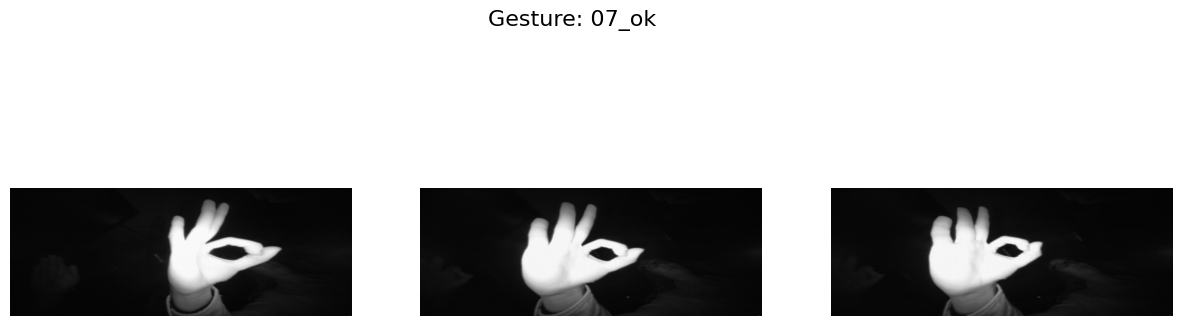

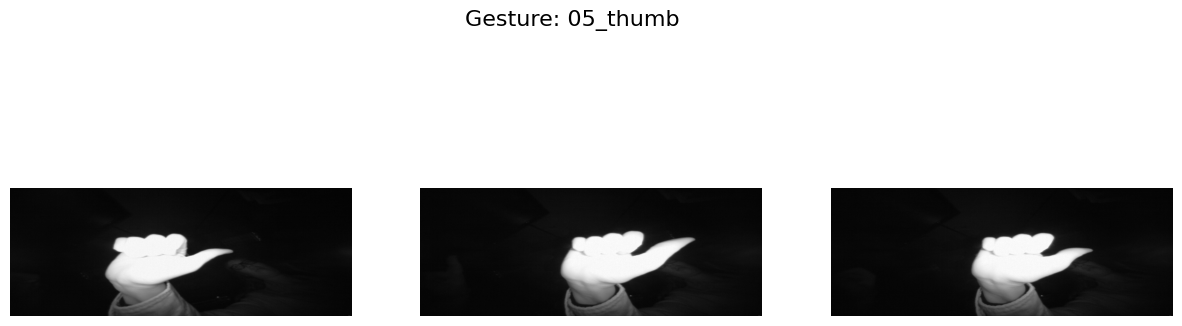

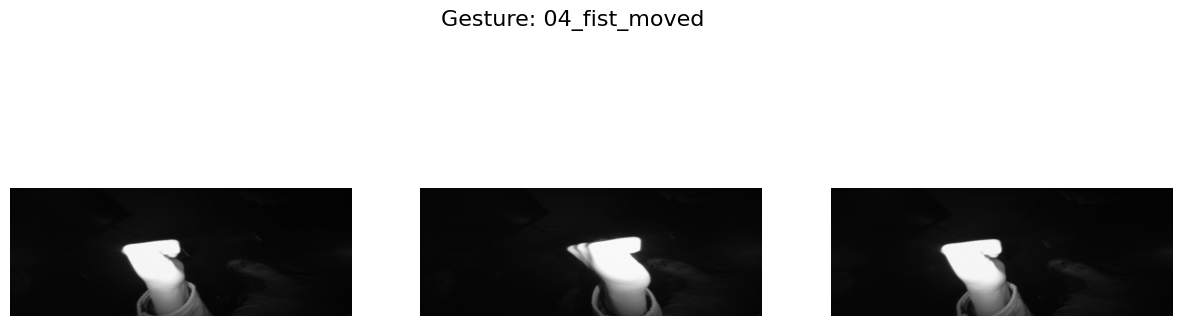

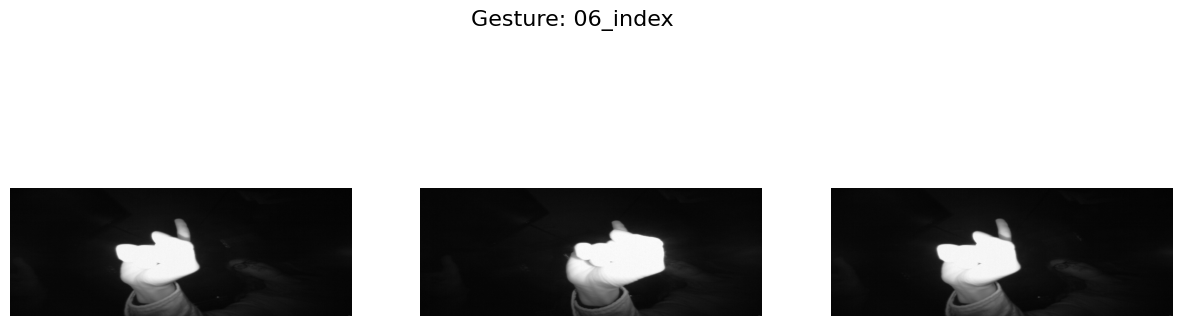

In [ ]:
import matplotlib.pyplot as plt
import os
import cv2

dataset_path = '/content/leapGestRecog/00'
gesture_folders = os.listdir(dataset_path)

def load_and_display_samples(folder, num_samples=3):
    folder_path = os.path.join(dataset_path, folder)
    images = os.listdir(folder_path)[:num_samples]

    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
    fig.suptitle(f'Gesture: {folder}', fontsize=16)

    for i, img_name in enumerate(images):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[i].imshow(img)
        axes[i].axis('off')

    plt.show()

for folder in gesture_folders:
    load_and_display_samples(folder, num_samples=3)


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)


Epoch 1/10
62/62 [==============================] - 179s 3s/step - loss: 2.2058 - accuracy: 0.1794 - val_loss: 1.9703 - val_accuracy: 0.3831
Epoch 2/10
62/62 [==============================] - 174s 3s/step - loss: 1.3791 - accuracy: 0.5244 - val_loss: 1.8903 - val_accuracy: 0.4299
Epoch 3/10
62/62 [==============================] - 184s 3s/step - loss: 0.8491 - accuracy: 0.7048 - val_loss: 1.5736 - val_accuracy: 0.5605
Epoch 4/10
62/62 [==============================] - 169s 3s/step - loss: 0.6159 - accuracy: 0.7856 - val_loss: 1.9464 - val_accuracy: 0.5136
Epoch 5/10
62/62 [==============================] - 174s 3s/step - loss: 0.5099 - accuracy: 0.8206 - val_loss: 2.2480 - val_accuracy: 0.5091
Epoch 6/10
62/62 [==============================] - 178s 3s/step - loss: 0.3871 - accuracy: 0.8659 - val_loss: 0.9048 - val_accuracy: 0.6250
Epoch 7/10
62/62 [==============================] - 174s 3s/step - loss: 0.2918 - accuracy: 0.9116 - val_loss: 1.4145 - val_accuracy: 0.4859
Epoch 8/10
62

In [ ]:
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print('Test accuracy:', test_acc)


62/62 [==============================] - 36s 575ms/step - loss: 0.9053 - accuracy: 0.7409
Test accuracy: 0.7409273982048035


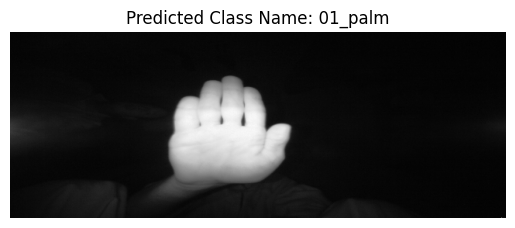

Image: /content/leapGestRecog/01/01_palm/frame_01_01_0001.png, Predicted Class Name: 01_palm, Prediction: None


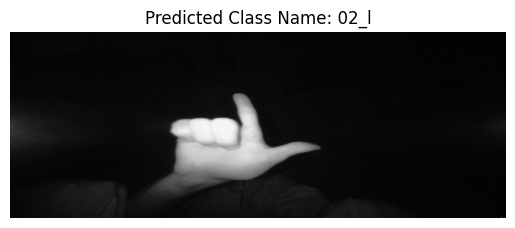

Image: /content/leapGestRecog/01/02_l/frame_01_02_0001.png, Predicted Class Name: 02_l, Prediction: None


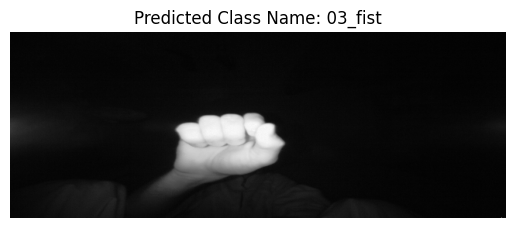

Image: /content/leapGestRecog/01/03_fist/frame_01_03_0001.png, Predicted Class Name: 03_fist, Prediction: None


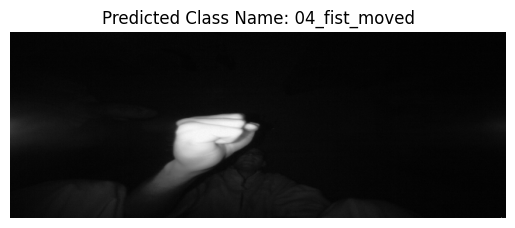

Image: /content/leapGestRecog/01/04_fist_moved/frame_01_04_0001.png, Predicted Class Name: 04_fist_moved, Prediction: None


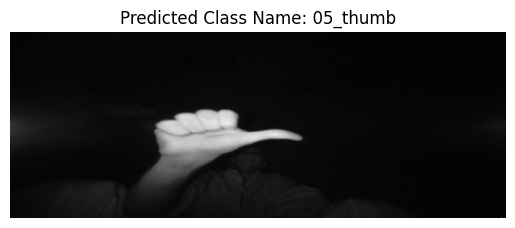

Image: /content/leapGestRecog/01/05_thumb/frame_01_05_0001.png, Predicted Class Name: 05_thumb, Prediction: None


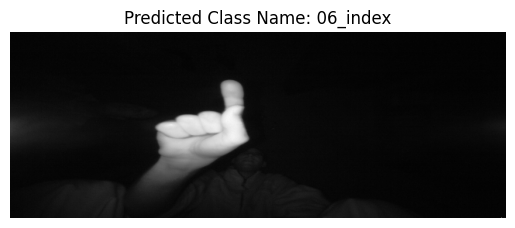

Image: /content/leapGestRecog/01/06_index/frame_01_06_0001.png, Predicted Class Name: 06_index, Prediction: None


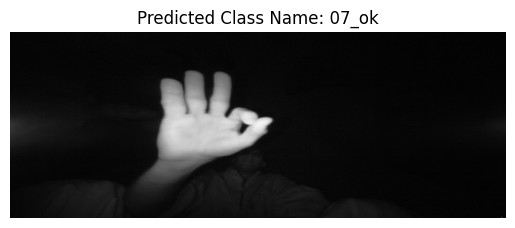

Image: /content/leapGestRecog/01/07_ok/frame_01_07_0001.png, Predicted Class Name: 07_ok, Prediction: None


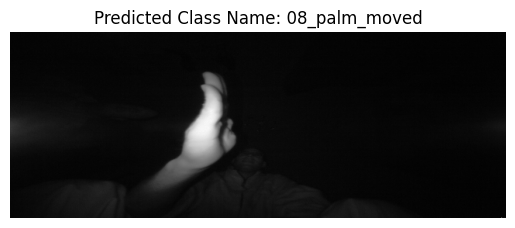

Image: /content/leapGestRecog/01/08_palm_moved/frame_01_08_0001.png, Predicted Class Name: 08_palm_moved, Prediction: None


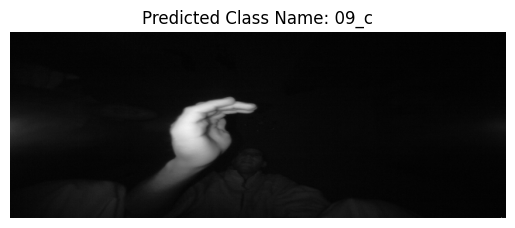

Image: /content/leapGestRecog/01/09_c/frame_01_09_0001.png, Predicted Class Name: 09_c, Prediction: None


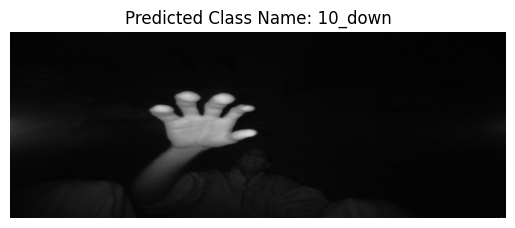

Image: /content/leapGestRecog/01/10_down/frame_01_10_0001.png, Predicted Class Name: 10_down, Prediction: None


In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

model = load_model('/content/my_model.h5')



def predict_gesture(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Unable to read image at {image_path}")
        return None, None
    img = cv2.resize(img, (150, 150))
    img = img / 255.0
    img = np.reshape(img, (1, 150, 150, 3))
    prediction = model.predict(img)
    gesture_index = np.argmax(prediction)
    gesture_name = gesture_names.get(gesture_index, 'Unknown')
    return gesture_name, prediction

validation_data_dir1 = '/content/leapGestRecog/01'

gesture_folders = [os.path.join(validation_data_dir1, d) for d in sorted(os.listdir(validation_data_dir1)) if os.path.isdir(os.path.join(validation_data_dir1, d))]

for folder in gesture_folders:

    sample_file = os.path.join(folder, sorted(os.listdir(folder))[0])

    gesture, prediction = os.path.basename(folder), None

    if gesture is None:
        continue

    img = cv2.imread(sample_file)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img_rgb)
    plt.title(f'Predicted Class Name: {gesture}')
    plt.axis('off')
    plt.show()

    print(f'Image: {sample_file}, Predicted Class Name: {gesture}, Prediction: {prediction}')
